<a href="https://colab.research.google.com/github/JeremiasSchultz/MODELO-RECOMENDA-O/blob/main/Day7_Jeremias5433.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [236]:
import pandas  as pd
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from google.colab import drive


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [237]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [238]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [239]:
link = '/content/gdrive/MyDrive/Colab Notebooks/day7/DNC_order_items_dataset.csv'
df_order_i = pd.read_csv(link,decimal='.',index_col = False)

link = '/content/gdrive/MyDrive/Colab Notebooks/day7/DNC_order_reviews_dataset.csv'
df_order_r = pd.read_csv(link,decimal='.',index_col = False)

link = '/content/gdrive/MyDrive/Colab Notebooks/day7/DNC_orders_dataset.csv'
df_order_d = pd.read_csv(link,decimal='.',index_col = False)

link = '/content/gdrive/MyDrive/Colab Notebooks/day7/DNC_products_dataset.csv'
df_products = pd.read_csv(link,decimal='.',index_col = False)

# DATA
df_order_i

df_order_r

df_order_d

df_products

# 1 - DEFINIÇÃO DO MODELO


#Modele de recomendação para clientes a partir do seu histórico de compras, ou seja de caracteristicas armazenadas do cliente.


Este Tipo de modelo é através de filtro colaborativo, encontrando a semelhança entre os produtos, e a semelhança entre os clientes.

## a - definição das amostragrens
  -clientes mais ativos?

  -produtos mais vendidos?

  -Maior score?

# 2 - Exploração dos Dados

## a - head

In [240]:
df_order_i.head()

,Unnamed: 0,order_id,order_item_id,product_id,price
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90


In [241]:
df_order_i[df_order_i['order_id']=='8272b63d03f5f79c56e9e4120aec44ef']

,Unnamed: 0,order_id,order_item_id,product_id,price
57297,57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,1.2
57298,57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,1.2
57299,57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,1.2
57300,57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,1.2
57301,57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,1.2
57302,57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,1.2
57303,57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,1.2
57304,57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,1.2
57305,57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,1.2
57306,57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,1.2


In [242]:
df_order_r.head()

,Unnamed: 0,review_id,order_id,review_score
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [243]:
df_order_d.head()

,Unnamed: 0,order_id,customer_id,order_status
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


In [244]:
df_products.head()

,Unnamed: 0,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,625.0,20.0,17.0,13.0


## b - Nunique

In [245]:
df_order_i.nunique()

Unnamed: 0       112650
order_id          98666
order_item_id        21
product_id        32951
price              5968
dtype: int64

In [246]:
df_order_r.nunique()

Unnamed: 0      99224
review_id       98410
order_id        98673
review_score        5
dtype: int64

In [247]:
df_order_d.nunique()

Unnamed: 0      99441
order_id        99441
customer_id     99441
order_status        8
dtype: int64

In [248]:
list(df_order_d['order_status'].unique())

['delivered',
 'invoiced',
 'shipped',
 'processing',
 'unavailable',
 'canceled',
 'created',
 'approved']

In [249]:
df_products.nunique()

Unnamed: 0                    32951
product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

## c - shape

In [250]:
df_order_i.shape

(112650, 5)

In [251]:
df_order_r.shape

(99224, 4)

In [252]:
df_order_d.shape

(99441, 4)

In [253]:
df_products.shape

(32951, 9)

## d - dtype

In [254]:
df_order_i.dtypes

Unnamed: 0         int64
order_id          object
order_item_id      int64
product_id        object
price            float64
dtype: object

In [255]:
df_order_r.dtypes

Unnamed: 0       int64
review_id       object
order_id        object
review_score     int64
dtype: object

In [256]:
df_order_d.dtypes

Unnamed: 0       int64
order_id        object
customer_id     object
order_status    object
dtype: object

In [257]:
df_products.dtypes

Unnamed: 0                      int64
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

## e - discribe

In [258]:
df_order_i.describe()

,Unnamed: 0,order_item_id,price
count,112650.000000,112650.000000,112650.000000
mean,56324.500000,1.197834,120.653739
std,32519.398249,0.705124,183.633928
min,0.000000,1.000000,0.850000
25%,28162.250000,1.000000,39.900000
50%,56324.500000,1.000000,74.990000
75%,84486.750000,1.000000,134.900000
max,112649.000000,21.000000,6735.000000


In [259]:
df_order_r.describe()

,Unnamed: 0,review_score
count,99224.000000,99224.000000
mean,49611.500000,4.086421
std,28643.645892,1.347579
min,0.000000,1.000000
25%,24805.750000,4.000000
50%,49611.500000,5.000000
75%,74417.250000,5.000000
max,99223.000000,5.000000


In [260]:
df_order_d.describe()

,Unnamed: 0
count,99441.000000
mean,49720.000000
std,28706.288396
min,0.000000
25%,24860.000000
50%,49720.000000
75%,74580.000000
max,99440.000000


In [261]:
df_products.describe()

,Unnamed: 0,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,16475.000000,48.476949,771.495285,2276.472488,30.815078,16.937661,23.196728
std,9512.278697,10.245741,635.115225,4282.038731,16.914458,13.637554,12.079047
min,0.000000,5.000000,4.000000,0.000000,7.000000,2.000000,6.000000
25%,8237.500000,42.000000,339.000000,300.000000,18.000000,8.000000,15.000000
50%,16475.000000,51.000000,595.000000,700.000000,25.000000,13.000000,20.000000
75%,24712.500000,57.000000,972.000000,1900.000000,38.000000,21.000000,30.000000
max,32950.000000,76.000000,3992.000000,40425.000000,105.000000,105.000000,118.000000


## f - Is null 

In [262]:
(df_order_i.isna()).sum()

Unnamed: 0       0
order_id         0
order_item_id    0
product_id       0
price            0
dtype: int64

In [263]:
(df_order_r.isna()).sum()

Unnamed: 0      0
review_id       0
order_id        0
review_score    0
dtype: int64

In [264]:
(df_order_d.isna()).sum()

Unnamed: 0      0
order_id        0
customer_id     0
order_status    0
dtype: int64

In [265]:
(df_products.isna()).sum()

Unnamed: 0                      0
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

## g - Duplicates

In [266]:
df_order_i.duplicated().value_counts()

False    112650
dtype: int64

## h - Graficos

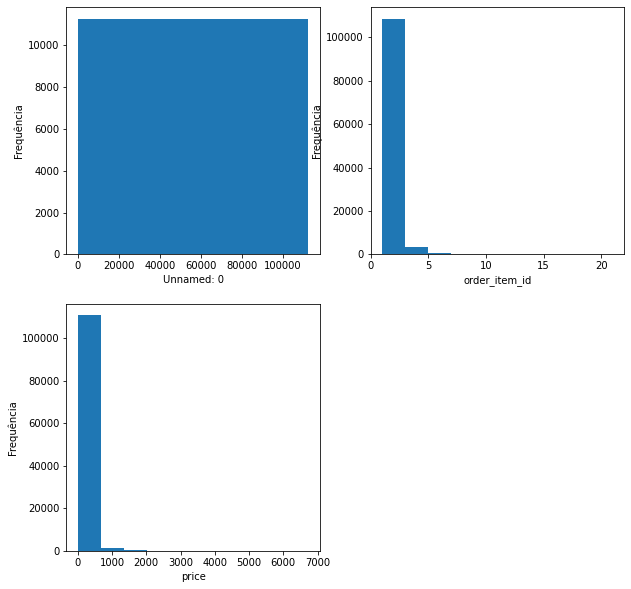

In [267]:
#df_order_i
contColNames = list(df_order_i.select_dtypes(include='number').columns)
ncols = 2
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,10))
counter = 0 

for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]
    # Plotar somente quando houver dados
    if counter < len(contColNames):
      ax.hist(df_order_i.select_dtypes(include='number')[contColNames[counter]], bins=10)
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel('Frequência')
    else:
      ax.set_axis_off()
    counter += 1
plt.show()

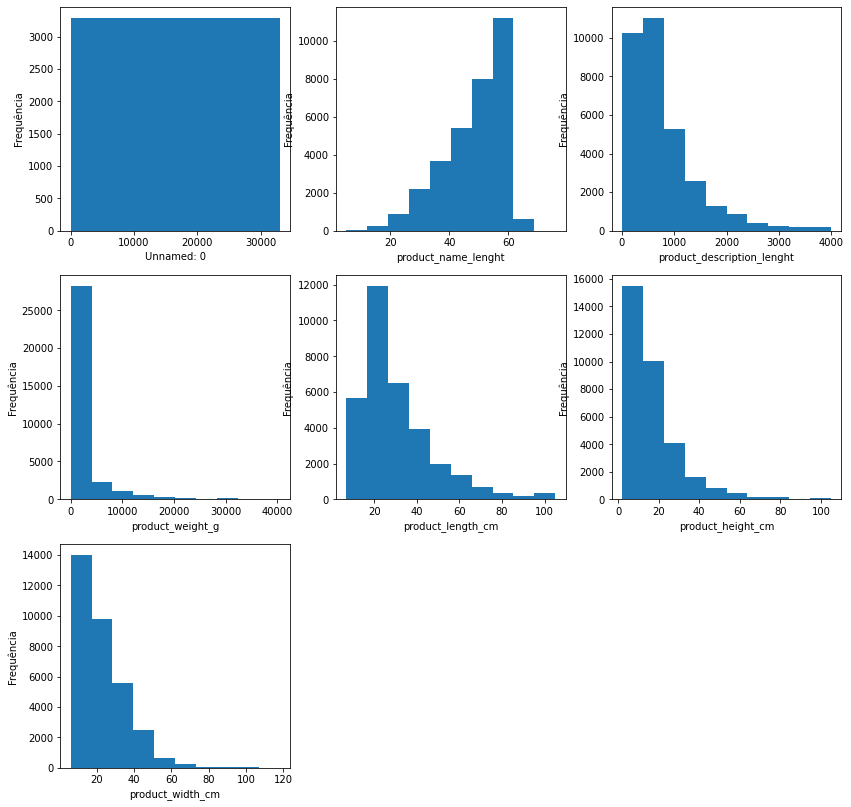

In [268]:
#df_products
contColNames = list(df_products.select_dtypes(include='number').columns)
ncols = 3
nrows = int(np.ceil(len(contColNames)/(1.0 * ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,14))
counter = 0 

for i in range(nrows):
  for j in range(ncols):
    ax = axes[i][j]
    # Plotar somente quando houver dados
    if counter < len(contColNames):
      ax.hist(df_products.select_dtypes(include='number')[contColNames[counter]], bins=10)
      ax.set_xlabel(contColNames[counter])
      ax.set_ylabel('Frequência')
    else:
      ax.set_axis_off()
    counter += 1
plt.show()

# 3 - ESTRUTURAÇÃO DOS DADOS

## a - DROP

In [269]:
df_order_i.drop(columns='Unnamed: 0', inplace=True)
df_order_r.drop(columns='Unnamed: 0', inplace=True)
df_order_d.drop(columns='Unnamed: 0', inplace=True)
df_products.drop(columns='Unnamed: 0', inplace=True)

## b - GROUPBY

In [270]:
df_order_i = df_order_i.groupby(by=['order_id', 'product_id'], as_index=False) \
  .agg({'price': np.sum, 'order_item_id':np.max})
df_order_i.head()



,order_id,product_id,price,order_item_id
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,1


# 4 - TRATAMENTO DOS DADOS

## a - União dos DF

df_order_i

df_order_r

df_order_d

df_products

In [271]:
df_merge = df_order_i.merge(df_order_d,how='inner',on=['order_id'])

In [272]:
df_merge.head()

,order_id,product_id,price,order_item_id,customer_id,order_status
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,1,3ce436f183e68e07877b285a838db11a,delivered
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,1,6489ae5e4333f3693df5ad4372dab6d3,delivered
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,1,d4eb9395c8c0431ee92fce09860c5a06,delivered
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,1,58dbd0b2d70206bf40e62cd34e84d795,delivered


In [273]:
df_merge.shape

(102425, 6)

In [274]:
df_merge = df_merge.merge(df_order_r,how='inner',on=['order_id'])

In [275]:
df_merge.head()

,order_id,product_id,price,order_item_id,customer_id,order_status,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,1,3ce436f183e68e07877b285a838db11a,delivered,97ca439bc427b48bc1cd7177abe71365,5
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,7b07bacd811c4117b742569b04ce3580,4
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,0c5b33dea94867d1ac402749e5438e8b,5
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,1,d4eb9395c8c0431ee92fce09860c5a06,delivered,f4028d019cb58564807486a6aaf33817,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,1,58dbd0b2d70206bf40e62cd34e84d795,delivered,940144190dcba6351888cafa43f3a3a5,5


In [276]:
df_merge.shape

(102230, 8)

In [277]:
df_merge = df_merge.merge(df_products,how='inner',on=['product_id'])

In [278]:
df_merge.head()

,order_id,product_id,price,order_item_id,customer_id,order_status,review_id,review_score,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,1,3ce436f183e68e07877b285a838db11a,delivered,97ca439bc427b48bc1cd7177abe71365,5,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,1,e6eecc5a77de221464d1c4eaff0a9b64,delivered,b11cba360bbe71410c291b764753d37f,5,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,1,4ef55bf80f711b372afebcb7c715344a,delivered,af01c4017c5ab46df6cc810e069e654a,4,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,1,30407a72ad8b3f4df4d15369126b20c9,delivered,8304ff37d8b16b57086fa283fe0c44f8,5,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,1,91a792fef70ecd8cc69d3c7feb3d12da,delivered,426f43a82185969503fb3c86241a9535,5,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0


In [279]:
df_merge.shape

(102230, 15)

In [280]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102230 entries, 0 to 102229
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    102230 non-null  object 
 1   product_id                  102230 non-null  object 
 2   price                       102230 non-null  float64
 3   order_item_id               102230 non-null  int64  
 4   customer_id                 102230 non-null  object 
 5   order_status                102230 non-null  object 
 6   review_id                   102230 non-null  object 
 7   review_score                102230 non-null  int64  
 8   product_category_name       100773 non-null  object 
 9   product_name_lenght         100773 non-null  float64
 10  product_description_lenght  100773 non-null  float64
 11  product_weight_g            102214 non-null  float64
 12  product_length_cm           102214 non-null  float64
 13  product_height

In [281]:
df_merge.describe()

,price,order_item_id,review_score,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,102230.000000,102230.000000,102230.000000,100773.000000,100773.000000,102214.000000,102214.000000,102214.000000,102214.000000
mean,132.321479,1.150279,4.076367,48.878360,786.235232,2086.822813,30.081711,16.391199,23.042382
std,203.764098,0.561197,1.354024,9.994545,650.091458,3746.745550,16.086648,13.300814,11.745616
min,0.850000,1.000000,1.000000,5.000000,4.000000,0.000000,7.000000,2.000000,6.000000
25%,44.900000,1.000000,4.000000,43.000000,348.000000,300.000000,18.000000,8.000000,15.000000
50%,80.300000,1.000000,5.000000,52.000000,602.000000,696.000000,25.000000,13.000000,20.000000
75%,146.990000,1.000000,5.000000,57.000000,985.000000,1800.000000,38.000000,20.000000,30.000000
max,13440.000000,21.000000,5.000000,76.000000,3992.000000,40425.000000,105.000000,105.000000,118.000000


In [282]:
df_merge.shape

(102230, 15)

In [283]:
df_merge.shape

(102230, 15)

In [284]:
df_merge.nunique()

order_id                      97917
product_id                    32789
price                          6950
order_item_id                    17
customer_id                   97917
order_status                      7
review_id                     97709
review_score                      5
product_category_name            73
product_name_lenght              66
product_description_lenght     2958
product_weight_g               2200
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [285]:
df_merge.head()

,order_id,product_id,price,order_item_id,customer_id,order_status,review_id,review_score,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,1,3ce436f183e68e07877b285a838db11a,delivered,97ca439bc427b48bc1cd7177abe71365,5,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,1,e6eecc5a77de221464d1c4eaff0a9b64,delivered,b11cba360bbe71410c291b764753d37f,5,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,1,4ef55bf80f711b372afebcb7c715344a,delivered,af01c4017c5ab46df6cc810e069e654a,4,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,1,30407a72ad8b3f4df4d15369126b20c9,delivered,8304ff37d8b16b57086fa283fe0c44f8,5,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,1,91a792fef70ecd8cc69d3c7feb3d12da,delivered,426f43a82185969503fb3c86241a9535,5,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0


In [286]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102230 entries, 0 to 102229
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_id                    102230 non-null  object 
 1   product_id                  102230 non-null  object 
 2   price                       102230 non-null  float64
 3   order_item_id               102230 non-null  int64  
 4   customer_id                 102230 non-null  object 
 5   order_status                102230 non-null  object 
 6   review_id                   102230 non-null  object 
 7   review_score                102230 non-null  int64  
 8   product_category_name       100773 non-null  object 
 9   product_name_lenght         100773 non-null  float64
 10  product_description_lenght  100773 non-null  float64
 11  product_weight_g            102214 non-null  float64
 12  product_length_cm           102214 non-null  float64
 13  product_height

In [287]:
df_merge[df_merge['order_id']=='1b15974a0141d54e36626dca3fdc731a']

,order_id,product_id,price,order_item_id,customer_id,order_status,review_id,review_score,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32613,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,2000.0,20,be1b70680b9f9694d8c70f41fa3dc92b,delivered,be332150a9c96e68c9565ea53cba2355,1,informatica_acessorios,43.0,452.0,360.0,19.0,18.0,15.0


## b - DROP

In [288]:
colunas_removidas = ["canceled", "unavailable", "invoiced", "processing", "created", "approved"]

df_merge['order_status'].replace(colunas_removidas, np.nan, inplace=True)

df_merge.dropna(subset=['order_status'], inplace=True)

df_merge.shape

(101146, 15)

In [289]:
df_merge = df_merge.drop(columns='order_status')

In [290]:
df_merge.shape

(101146, 14)

# 5 - CRIAÇÃO DO MODELO

In [291]:
df_final = df_merge.copy()

## a - A nivel de produto - Mais vendidos

In [292]:
top_itens_quantidade = df_final.groupby(by='product_id', as_index=False) \
  .agg({'order_item_id':np.sum, 'price':np.sum}) \
  .rename(columns = {'order_item_id':'quantidade vendida', 'price':'preço total'}) \
  .set_index('product_id') \
  .sort_values('quantidade vendida', ascending=False)
top_itens_quantidade.head(10)

,quantidade vendida,preço total
product_id,,
aca2eb7d00ea1a7b8ebd4e68314663af,526,37389.00
422879e10f46682990de24d770e7f83d,515,26680.12
99a4788cb24856965c36a24e339b6058,513,42306.36
389d119b48cf3043d311335e499d9c6b,419,21336.79
368c6c730842d78016ad823897a372db,407,21072.80
53759a2ecddad2bb87a079a1f1519f73,403,20391.20
d1c427060a0f73f6b889a5c7c61f2ac4,344,46618.51
53b36df67ebb7c41585e8d54d6772e08,325,37312.74
154e7e31ebfa092203795c972e5804a6,294,6573.08


## b - A nivel de produto - Mais rentaveis

In [293]:
top_itens_receita = df_final.groupby(by='product_id', as_index=False) \
  .agg({'order_item_id':np.sum, 'price':np.sum}) \
  .rename(columns = {'order_item_id':'quantidade vendida', 'price':'preço total'}) \
  .set_index('product_id') \
  .sort_values('preço total', ascending=False)
top_itens_receita.head(10)

,quantidade vendida,preço total
product_id,,
bb50f2e236e5eea0100680137654686c,196,64210.00
6cdd53843498f92890544667809f1595,156,54380.30
d6160fb7873f184099d9bc95e30376af,34,47249.35
d1c427060a0f73f6b889a5c7c61f2ac4,344,46618.51
99a4788cb24856965c36a24e339b6058,513,42306.36
3dd2a17168ec895c781a9191c1e95ad7,273,40782.80
25c38557cf793876c5abdd5931f922db,38,37908.32
5f504b3a1c75b73d6151be81eb05bdc9,64,37733.90
aca2eb7d00ea1a7b8ebd4e68314663af,526,37389.00


## c - A nivel de cliente - Que mais compararam

In [294]:
top_clientes_quantidade = df_final.groupby(by='customer_id', as_index=False) \
  .agg({'order_item_id':np.sum, 'price':np.sum}) \
  .rename(columns = {'order_item_id':'quantidade vendida', 'price':'preço total'}) \
  .set_index('customer_id') \
  .sort_values('quantidade vendida', ascending=False)
top_clientes_quantidade.head(10)

,quantidade vendida,preço total
customer_id,,
be1c4e52bb71e0c54b11a26b8e8d59f2,82,1430.16
fc3d1daec319d62d49bfb5e1f83123e9,52,31.80
0d861a5e4dd6a9079d89e1330848f0ab,43,1138.30
daf15f1b940cc6a72ba558f093dc00dd,31,958.80
a67a246af6ba598a14cc86df3c0354ee,28,563.00
30bb84b541c96af98ba7d90b9ebf35d0,28,1093.00
1205480caca6c37f55954da838933b8a,28,186.59
50920f8cd0681fd86ebe93670c8fe52e,26,306.77
679f84ceb2ee4ca5bca0c3ea34647746,26,479.20


In [295]:
df = df_final

In [296]:
dfa = df.copy()

## d - Função parte 1

In [297]:
# Faz uma cópia para que o dataset original não seja alterado
def start_pipeline(df):
    return df.copy()

# Agrupa o dateset por usuários e conta quantos livros diferentes cada um tem
# Ordena para que os usuários com mais livros fiquem no topo do dataset
def get_user_counts(df): 
  return df.groupby(by='customer_id', as_index=False) \
    .agg({'product_id': pd.Series.nunique}) \
    .rename(columns={'product_id': 'product_id_count'}) \
    .set_index('customer_id') \
    .sort_values('product_id_count', ascending = False)

# Agrupa o dateset por livros e conta quantos usuários diferentes cada lirvro tem
# Ordena para que os livros com mais usuários diferentes fiquem no topo do dataset
def get_product_counts(df): 
  return df.groupby(by='product_id', as_index=False) \
    .agg({'customer_id': pd.Series.nunique}) \
    .rename(columns={'customer_id': 'customer_id_count'}) \
    .set_index('product_id') \
    .sort_values('customer_id_count', ascending = False)

def get_product_review(df): 
  return df.groupby(by='product_id', as_index=False) \
    .agg({'review_score': np.mean}) \
    .rename(columns={'review_score': 'review'}) \
    .set_index('product_id') \
    .sort_values('review', ascending = False)

#Recebe o dataset e o tamanho da amostra
 # Retorna as n primeiras linhas do dataset recebido em formato de lista
def get_n_top_values(df, n): 
  return df.head(sample_size) \
    .index \
    .tolist()

 # Executa as funções acima para rankear os usuários
sample_size = 100
top_user_ids = df \
  .pipe(start_pipeline) \
  .pipe(get_user_counts) \
  .pipe(get_n_top_values, sample_size)

# Executa as funções acima para rankear os produtos mais vendidos
sample_size = 850  
top_product_ids = df \
  .pipe(start_pipeline) \
  .pipe(get_product_counts) \
  .pipe(get_n_top_values, sample_size)

# Executa as funções acima para rankear os produtos mais bem avaliados
sample_size = 850 
top_product_review = df \
  .pipe(start_pipeline) \
  .pipe(get_product_review) \
  .pipe(get_n_top_values, sample_size)

In [298]:
#top_user_ids

In [299]:
#top_product_ids

In [300]:
#top_product_review

## e - Função parte 2 - similaridade clientes

In [301]:
#Transforma a amostra em um dataset, renomeando as colunas.
def transform_sample(df):
  return pd.DataFrame({
      "user": df["customer_id"],
      "product": df["product_id"],
      "purchase": df["order_item_id"]
  })

# Seleciona só os User-IDs que estão entre os top Users, transforma amostra em um dataframe e organiza o dataset em uma matriz Cliente x Produto 
matriz_de_relacionamento_user_sampled = df[df["customer_id"].isin(top_user_ids)] \
  .pipe(transform_sample) \
  .pivot_table(index="user", columns="product", values="purchase").fillna(0)

In [302]:
matriz_de_relacionamento_user_sampled

product,0011c512eb256aa0dbbb544d8dffcf6e,0111ab6fb41da433e0f17d3f4ec2c8f5,01c2e91674406ebaca6a1bbf7f61c3f0,01d4157fd9738ea81038316ae4cfc192,0333795efd58e3c33c5850b92721c3e4,03d817e5e392e78674ed0bd8195f9159,0522015abfd1094949180dee8dacbdf9,05805f52cdeb93d7684f871e599f0078,060ea530ba6184d49f7b1cc031c4c97e,060f0122cdc8f25db4a0d7359fdae7b0,064c975d37d3c646bd94d94c6e16f37e,08ef02b6aae73ad3a385cf1342f609c7,0a4093a4af429dc0a9334300e5c13ae5,0a56efd5f050d3f861a04c6f005d1128,0a9a9c25c5a06532d1766e00db833a7f,0bcc3eeca39e1064258aa1e932269894,0bdd9a52d192d64770e33ae559512478,0cf13ac73dbcf6586ba63b89dd1f780a,0cf2faf9749f53924cea652a09d8e327,0dce4d890959f0607b58e7475d13fc86,0de59eddc63167215c972b0d785ffa7b,0e2c6b2fc22b192f824a68a0fa537aa0,0e35a413d832e63c5d46101b7c88de0f,0e92dcf7b03df1de4e9349af065f8e63,0f6e214a2c5baab8c1ccb053a0829f13,0fa81e7123fd0ebe03adbbe99d912827,1065e0ebef073787a7bf691924c60eeb,113f80f12c8892f0c59206f70b862b40,1179867d805886591809f49767db9ecd,12ad279319eff927d9333b42f3382ff8,154696c4f8e96ed48f0c191eb09c0683,155815f7173905f1e5cde0b82adfc113,15b5d9fcf84c060e00b0883def7d10e6,17d8b8e9c21ec0fc5b33724e32fe422e,186fe07c8b8005ec6a498587ffbc1352,18796df281656da4036dd926561a6030,18fa9cc25ea8b54f32d029f261673c0f,1a06a6a66ab23d70e02b8f92650e268f,1aa2ed670a95e9f475723707a7c3f386,1b0e9a414e59a00b13262ffb248ed9b4,...,e256d05115f9eb3766f3ab752132a4e2,e273c62ea30d5ca1753739e6d25d15a1,e478d0bd1efbc9329837d30c174bb850,e4c7ed7a832858c17d60ad5e38b00aba,e5897f494af72d083f3899808f341659,e6e3140cdd035e915d6d4a9eae2ccead,e76572c2ae4cede1e3b2ead512423efe,e82b2802625252b6d72b3e1d36f82670,e892e0e01990e737eb81a57db12f8c8c,e95fb3a80ca294f39de925b6428f3a32,e9e1e0a297e5a8f045e8c0395c4c745b,eaf84e31d1e891449aa5cf7130e75fc6,eb048e296b8db6cd64b1bafd9500786c,eb53f94fdc60278efcef123bb275658a,ebf969336461d98e41d31673d8af75ba,ecfb5255f55715e1faec3e6a316da6c3,ede062bcd13ef64b5cc87369e4edaf62,eeab31cd2a4bcd64e6b249e0a674b3a8,ef66e63137bdd1b2e44aa968646fc1e3,f16e5b7883c1349e57bc5e92ba9e0d96,f2bec64d5d795250be5e5ec2d38a19b6,f2d649f157cebee085ed738f23d5d6b7,f2e53dd1670f3c376518263b3f71424d,f303e2cdf0967ef1a153d12f2685d280,f35013cb05a9538a4428fa6161b2c96b,f3a0e8de0d8bada90f638dd837416ad7,f3a1a865ba61412ac17ab53f1a9c0082,f3fad6d734fb27bf8a548562e04f9a5e,f4d705aa95ccca448e5b0deb6e5290ba,f97194491a605b1d0e50d631e443cb5a,f97a136cf6e5f5d9333b513afc8b153e,fa243e761ae871597627e917611eeb23,fa6abc53b6abfed3231c37cfa290850a,fa814ebf85f1640b2acea3c4378d40f9,fb783e3e545937820b57fe539b2c5a6c,fbce4c4cb307679d89a3bf3d3bb353b9,fc6b299cf83fa76632dd1b0a2c611f33,fd440fd792fd8a4b681f1eb258c25445,fd471a043ee8b8dd27f4086495e0724c,fef0dd8c53552d0f784b7cc5375a3ffe
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00ca6e4277e535d41bda84d371310be2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09cc193befa14d698869667e92148ab2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0a4a8ee3c788108918b12f21435c950c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0aad2e31b3c119c26acb8a47768cd00a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [303]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculando a similaridade entre os usuários através da multiplicação da matriz CxP pela sua transposta
cos_user = cosine_similarity(matriz_de_relacionamento_user_sampled)
#Imprimindo o resultado
cos_user.sum()

106.15011306983709

## f - função similaridade produtos

In [304]:
df.shape

(101146, 14)

In [305]:
matriz_de_relacionamento_product_sampled = df[df["product_id"].isin(top_product_ids)] \
  .pipe(transform_sample) \
  .pivot_table(index="user", columns="product", values="purchase").fillna(0)

In [306]:
matriz_de_relacionamento_product_sampled.T.head(10)

user,00012a2ce6f8dcda20d059ce98491703,0004164d20a9e969af783496f3408652,00046a560d407e99b969756e0b10f282,00066ccbe787a588c52bd5ff404590e3,000e943451fc2788ca6ac98a682f2f49,000fd45d6fedae68fc6676036610f879,001028b78fd413e19704b3867c369d3a,0012a5c13793cf51e253f096a7e740dd,0015f7887e2fde13ddaa7b8e385af919,0017a0b4c1f1bdb9c395fa0ac517109c,0019c9aaad15b043c48f0a1180f22ce8,001c7f05398c45b42eee0d5a77783bca,001f35d9f262c558fd065346fbf5801d,001f6f1a5e902ad14e1f709a7215de11,002905287304e28c0218389269b4759b,002d358e2462f87678443706cbf2eb21,002f067b028a3643ad3a0969c7a0f3dc,0030aded3a67b29946a128ee8468388e,00330644cccc5db0276fa836976306fe,0033823ee55671ac5317d423291333c2,003bdf7fd8312f9d14a4b979f3747334,003e45472805afa1ee701d83284fa22b,00426311a53f3c052943c88b692a3be2,0042d04ee8231b36dcb29aac213f5db4,0049e8442c2a3e4a8d1ff5a9549abd53,004a2b3e8b026284407c620f4f01f686,004df18653e9438571e9d294776a5c5c,004f39eb181d53fa796fe82ce7a0cbd5,0050b4dd994efa94b2cd3210e4cecf32,005196c65bab2861e397cc85bc7664bf,0054f2f885ca69abcf4935c9506d7851,005596395ca3acd0433fe7d6f95a028e,00573ea7a2ac9dff51ac3d177cd6eaea,0058ebe2dc136d918dd001968cfa5903,00620f738107803e6c0f6818a7a3b7e3,0063913c2f1878cc471de963dc0571c4,0063bdf3bf91260f76973a4af6f9199e,006431d77c665533ac99b501d8a6ab06,006496598c918064dc19eef95e5e47f8,00652f7a6e012d58f58fefd69d1a1ea4,...,ffb352544f1296ee263ecd1b69726e43,ffb53eb1e2c74880a3f552a3a32a68ca,ffb5eaca500a57b7dd52256fcfc82e12,ffb6bb7dbfa226abbb5f1c27bb3b7a6f,ffb81db92e7ac00ecfac978f673be8a6,ffbc1b5517c488c7959e231ff9a0a787,ffbcf1eb664ce45bed8883fbcbdc2b06,ffbda9243760f2492df6e71c590e070a,ffbf13c83712766447907c175ecf4b61,ffc1df0bc187796047379f3b99a4f08c,ffc5e5000221495c2cbb2b099aaec969,ffcbcec4480d074ffd50398e66bff27c,ffcd14ed59af25129b69e7225a599db9,ffceee06e0f7d5d3747eae50a0ccd61f,ffd940dedc35e4f459eddfa41291e824,ffdaaad4323306777060ca43b3f87e7f,ffdaff86e5834cb843ada60a745d4222,ffdb7e488ea7c83b9c1258ee2d3776fa,ffdbd1a1e9a23977e4d638c2b0ccd0b9,ffdd13826fa94a17a1455e2367d3ba86,ffdd80d8f3655192a9d2a38d5b18732c,ffde64401f7cb62d2e8696d9467c781d,ffe0a690236043c15cf261a5d9fa5b5f,ffe0aaaac429db7837e943b83ee6c385,ffe0c2303d9a83448060ef69560c8bc8,ffe1eab23bff108bf37c973b05d4e9ba,ffe6224c02307bc5fd2e5c7566bd674a,ffe6d825d8a60d5cca942bcc57e9d8e6,ffeaa6d37b3691d54a01171f6562f44f,ffeac04ef924e20238b3ad2f9cecfbfa,ffed5d4f6245fe13cd57054621eec36a,ffed827348cd4b083956ce2b634b763b,fff0f9fbcdf9cfe4d9328bd3a7af71d7,fff212062d600f2e1d53f3c5d4a25138,fff4f0c85a4d710abe06599e1ed08a42,fff5169e583fd07fac9fec88962f189d,fff5dd22d522cf28a902185817642a2e,fff906ecb75de5809be384e0f8d65e45,fffb97495f78be80e2759335275df2aa,ffff42319e9b2d713724ae527742af25
product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
008cff0e5792219fae03e570f980b330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
014a8a503291921f7b004a5215bb3c36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0152f69b6cf919bcdaf117aa8c43e5a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
016711f78a6a87696645db0a6a834826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [307]:
matriz_de_relacionamento_product_sampled.shape

(32630, 850)

In [308]:
# Calculando a similaridade entre os livros através da multiplicação da matriz Produto x Cliente pela sua transposta 
cos_item = cosine_similarity(matriz_de_relacionamento_product_sampled.T)
# Imprimindo o resultado
print(cos_item)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [309]:
cos_item.sum()

887.9424155839733

# 6 - Teste do modelo

In [310]:
corr_items = np.corrcoef(matriz_de_relacionamento_product_sampled.T)

produto_de_interesse = matriz_de_relacionamento_product_sampled.T.index[-1]

print(f"Produto de interesse: {produto_de_interesse}")

produto_idx = matriz_de_relacionamento_product_sampled.T.index.tolist().index(produto_de_interesse)
print(f"Produto de id: {produto_de_interesse},tem índice {produto_idx}")

closest_10_products = np.argsort(-corr_items[produto_idx])[:10]

for i in zip(matriz_de_relacionamento_product_sampled.T.index[closest_10_products], corr_items[produto_idx][closest_10_products]):
    print(f"Produto {i[0]} tem similaridade {i[1]:.5f} com produto {produto_de_interesse}")

Produto de interesse: ffc9caf33e2d1e9f44e3e06da19085f7
Produto de id: ffc9caf33e2d1e9f44e3e06da19085f7,tem índice 849
Produto ffc9caf33e2d1e9f44e3e06da19085f7 tem similaridade 1.00000 com produto ffc9caf33e2d1e9f44e3e06da19085f7
Produto 18486698933fbb64af6c0a255f7dd64c tem similaridade -0.00040 com produto ffc9caf33e2d1e9f44e3e06da19085f7
Produto 22594ba8fd9a72ad95d352929c821560 tem similaridade -0.00044 com produto ffc9caf33e2d1e9f44e3e06da19085f7
Produto 1d3ecbda18167c766a3381fd16108e4a tem similaridade -0.00049 com produto ffc9caf33e2d1e9f44e3e06da19085f7
Produto be0dbdc3d67d55727a65d4cd696ca73c tem similaridade -0.00049 com produto ffc9caf33e2d1e9f44e3e06da19085f7
Produto d6fe3b4ddecd4a8393c6a1385de3bfb6 tem similaridade -0.00050 com produto ffc9caf33e2d1e9f44e3e06da19085f7
Produto 6a0713a63e990052795623e76cc2995e tem similaridade -0.00050 com produto ffc9caf33e2d1e9f44e3e06da19085f7
Produto ead3077a141a9c800d6a4bb9d0d415b6 tem similaridade -0.00051 com produto ffc9caf33e2d1e9f44e3

In [311]:
corr_items = np.corrcoef(matriz_de_relacionamento_user_sampled)

user_de_interesse = matriz_de_relacionamento_user_sampled.index[-1]

print(f"User de interesse: {user_de_interesse}")

user_idx = matriz_de_relacionamento_user_sampled.index.tolist().index(user_de_interesse)
print(f"Produto de id: {user_de_interesse},tem índice {user_idx}")

closest_10_users = np.argsort(-corr_items[user_idx])[:10]

for i in zip(matriz_de_relacionamento_user_sampled.index[closest_10_users], corr_items[user_idx][closest_10_users]):
    print(f"User {i[0]} tem similaridade {i[1]:.5f} com user {user_de_interesse}")

User de interesse: fee8071ecc5ad2f5b2831c4fbd9b3cdd
Produto de id: fee8071ecc5ad2f5b2831c4fbd9b3cdd,tem índice 99
User fee8071ecc5ad2f5b2831c4fbd9b3cdd tem similaridade 1.00000 com user fee8071ecc5ad2f5b2831c4fbd9b3cdd
User 12560c8fc6ef4609768854c0dec45c80 tem similaridade -0.00675 com user fee8071ecc5ad2f5b2831c4fbd9b3cdd
User 837bffa34c99bc9aed29abf1b5bdd886 tem similaridade -0.00709 com user fee8071ecc5ad2f5b2831c4fbd9b3cdd
User e804e7ef5f81657fd973fde6a032d3f4 tem similaridade -0.00709 com user fee8071ecc5ad2f5b2831c4fbd9b3cdd
User 6c185ed34983b0d80f77402efb2453bc tem similaridade -0.00709 com user fee8071ecc5ad2f5b2831c4fbd9b3cdd
User 00ca6e4277e535d41bda84d371310be2 tem similaridade -0.00709 com user fee8071ecc5ad2f5b2831c4fbd9b3cdd
User a51ebdfce7cdd6930370083085f240c6 tem similaridade -0.00709 com user fee8071ecc5ad2f5b2831c4fbd9b3cdd
User 2e70fb007f814f4e0bc167ca49d271f6 tem similaridade -0.00709 com user fee8071ecc5ad2f5b2831c4fbd9b3cdd
User 8c4a739a0897f0706505e419d7f1e4ac t

# 7 - Ajustes no portifólio

a - Para fim de aplicação, todo o desenvolvimento que aconteceu neste notebook, pode ser migrado para para uma aplicação direta. Pode se criar funções em arquivos .py especificos para ser embarcado em varios tipos de aplicação

b - Com todo o estudo aplicado fica evidente a possibilidade das bases de dados fornecidas, se encontrar os melhores clientes, os produtos mais vendidos e os mais rentaveis. Com todas as possibilidades fica a critério da empresa definir o ponto mais impactante.